In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.rc("font", family="serif")

In [2]:
fname = "../assets/liu-player-data.csv"

In [3]:
df = pd.read_csv(fname)
df.fillna(False, inplace=True)
df.columns

Index(['First Name', 'Last Name', 'Email', 'Gender', 'Age', 'Birthday',
       'Combined Name', 'Address', 'Address 2', 'City', 'State', 'Zip',
       'USAU ID#', 'Waiver Status', 'Membership Level', 'Phone', 'Youth Event',
       '2015 PPMHT', '2016 Winter Indoor', '2016 Spring YMCA Pickup',
       '2016 Spring Hat', 'Womens League 2016', 'HUSL 2016', 'Beach Hat 2016',
       '2016 Fall YMCA Pickup', '2016 PPMHT', 'Winter Indoor 2017',
       'Spring Hat 2017', 'Spring YMCA 2017', 'Men's League 2017',
       'Women's League 2017', 'Mixed League 2017', 'Beach Tournament 2017',
       'U19 L2P League 2017', 'Fall YMCA 2017', '2017 PPMHT',
       'Winter Indoor 2018', 'Spring Hat 2018', 'Womens League 2018',
       'Mens League 2018', 'AMSL 2018', 'Beach Tournament 2018',
       'Fall League 2018', 'Womens Fall Pickup 2018', '2018 PPMHT',
       'Indoor Pickup 2018-2019 ', 'Winter Indoor League 2019',
       'Winter Indoor Pickup 2019-2020', 'Winter Indoor League 2020',
       'Fall Leag

In [4]:
df["Gender"].unique()

array(['F', 'M', False, 'male', 'female'], dtype=object)

In [5]:
# Let's clean the `Gender` column so that M/male and F/female are merged
df.replace({"Gender": "M"}, "male", inplace=True)
df.replace({"Gender": "F"}, "female", inplace=True)
df["Gender"].unique()

array(['female', 'male', False], dtype=object)

We can assume that the columns after `Youth Event` are ordered by date, so lets isolate those columns so that we can aggregate over them.

In [6]:
event_columns = df.columns[df.columns.get_loc("2015 PPMHT"):]
df.replace("Y", True, inplace=True)
df[event_columns].head()

,2015 PPMHT,2016 Winter Indoor,2016 Spring YMCA Pickup,2016 Spring Hat,Womens League 2016,HUSL 2016,Beach Hat 2016,2016 Fall YMCA Pickup,2016 PPMHT,Winter Indoor 2017,...,AMSL 2018,Beach Tournament 2018,Fall League 2018,Womens Fall Pickup 2018,2018 PPMHT,Indoor Pickup 2018-2019,Winter Indoor League 2019,Winter Indoor Pickup 2019-2020,Winter Indoor League 2020,Fall League 2020
0,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,True,True,True,...,False,False,True,False,True,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [7]:
def plot_by_event(arr, event_columnds, label=None, fig_ax=None):
    if fig_ax:
        fig, ax = fig_ax
    else:
        fig, ax = plt.subplots(1)
    if label:
        ax.plot(arr, label=label)
    else:
        ax.plot(arr)
    ax.set_xticklabels(event_columns, rotation="vertical")
    plt.grid(True)
    return fig, ax

<ipython-input-7-4b20754bd030>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(event_columns, rotation="vertical")


Text(0, 0.5, 'Attendance [# people]')

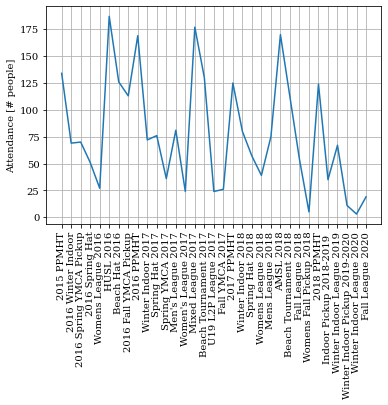

In [8]:
attendance = df[event_columns].sum(axis=0)
fig, ax = plot_by_event(attendance, event_columns)
ax.set_ylabel("Attendance [# people]")

<ipython-input-7-4b20754bd030>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(event_columns, rotation="vertical")


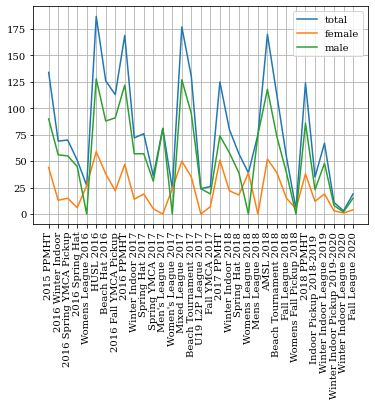

In [9]:
female_attendance = df[df["Gender"] == "female"][event_columns].sum(axis=0)
male_attendance = df[df["Gender"] == "male"][event_columns].sum(axis=0)

fig, ax = plot_by_event(attendance, event_columns, label="total")
fig, ax = plot_by_event(female_attendance, event_columns, label="female", fig_ax = (fig, ax))
fig, ax = plot_by_event(male_attendance, event_columns, label="male", fig_ax = (fig, ax))
ax.legend()

Let's trim the single-gender leagues to look at only co-ed.

In [10]:
# this covers 'women' and 'men' events
coed_events = [col for col in event_columns if "men" not in col.lower()]
# This event was also only attended by men
coed_events.remove("U19 L2P League 2017")

<ipython-input-7-4b20754bd030>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(event_columns, rotation="vertical")


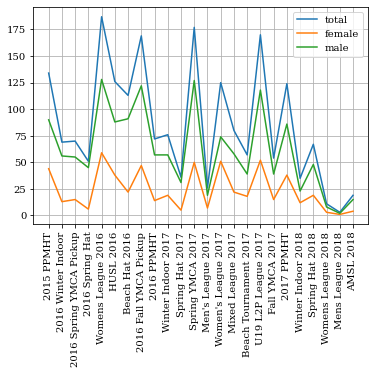

In [11]:
attendance = df[coed_events].sum(axis=0)
female_attendance = df[df["Gender"] == "female"][coed_events].sum(axis=0)
male_attendance = df[df["Gender"] == "male"][coed_events].sum(axis=0)

fig, ax = plot_by_event(attendance, coed_events, label="total")
fig, ax = plot_by_event(female_attendance, coed_events, label="female", fig_ax = (fig, ax))
fig, ax = plot_by_event(male_attendance, coed_events, label="male", fig_ax = (fig, ax))
ax.legend()

<ipython-input-7-4b20754bd030>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(event_columns, rotation="vertical")


Text(0, 0.5, 'Percent female attendance (%)')

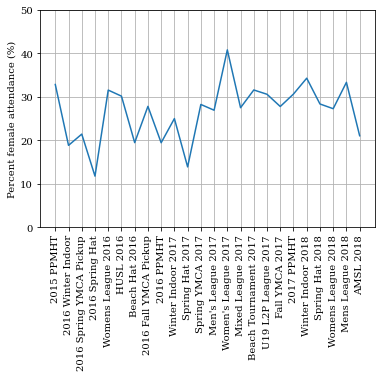

In [12]:
fig, ax = plot_by_event(100 * female_attendance / attendance, coed_events, label="% female")
ax.set_ylim(0, 50)
ax.set_ylabel("Percent female attendance (%)")

Is this trend increasing? Let's see.

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [14]:
X = np.arange(len(coed_events)).reshape(-1, 1)
y = (100 * female_attendance / attendance).to_numpy().reshape(-1, 1)  # female percentage
LR = LinearRegression()
_ = LR.fit(X=X, y=y)
score = LR.score(X=X, y=y)

<ipython-input-7-4b20754bd030>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(event_columns, rotation="vertical")


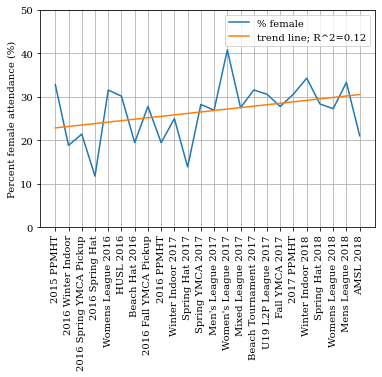

In [15]:
fig, ax = plot_by_event(100 * female_attendance / attendance, coed_events, label="% female")
ax.set_ylim(0, 50)
ax.set_ylabel("Percent female attendance (%)")
ax.plot(X, LR.predict(X), label=f"trend line; R^2={score:.2f}")
ax.legend()

Not bad!

Note: lower $R^2$ is better (1 is the max and 0 is the min), since it means it is more predictive.